In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def linear_theory(x_exp, y_exp):
    """
    :param x_exp: list -- experimental data for x-axis
    :param y_exp: list -- experimental data for y-axis
    :return: x_th, y_th -- lists with linear approximation of experimental data
    """
    k = np.polyfit(x_exp, y_exp, 1)
    m, M = min(x_exp), max(x_exp)
    x_th = np.arange(m - 0.05 * (M - m), M + 0.05 * (M - m), 0.0001 * (M - m))
    y_th = []
    for _ in range(0, len(x_th)):
        y_th.append(k[0] * x_th[_] + k[1])
    return x_th, y_th


def plot1(x_exp, y_exp, x_name='', y_name='', legend="Линейная аппроксимация", x_err=0, y_err=0, epsilon_x=0, epsilon_y=0):
    """
    Function for drawing plot with one curve of points (x_exp, y_exp) with linear approximation and error-bars
    :param x_exp: list -- experimental data for x-axis
    :param y_exp: list -- experimental data for y-axis
    :param x_name: string -- name for x-axis
    :param y_name: string -- name for x-axis
    :param legend: string -- legend for plot
    :param x_err -- array with erros
    :param y_err -- array with erros
    :param epsilon_x -- enables relative errors mode with epsilon (not working)
    :return: plot
    """
    x_th, y_th = linear_theory(x_exp, y_exp)
    if(epsilon_x==0 and epsilon_y==0):
        plt.figure(figsize=(10, 5))
        plt.plot(x_th, y_th, label=legend)
        plt.errorbar(x_exp, y_exp, x_err, y_err, fmt=".k", label="Экспериментальные точки")

    plt.xlabel(x_name, fontsize=14)
    plt.ylabel(y_name, fontsize=14)
    plt.grid(True)
    plt.legend(loc='best', fontsize=12)
    plt.show()


def plot_3_on_1(x_exp1, y_exp1, x_name1, y_name1, legend1, x_err_formula_index1, y_err_formula_index1,
                x_exp2, y_exp2, x_name2, y_name2, legend2, x_err_formula_index2, y_err_formula_index2,
                x_exp3, y_exp3, x_name3, y_name3, legend3, x_err_formula_index3, y_err_formula_index3, title):
    """
    Function for drawing plot with three subplots each containing one curve of points (x_exp, y_exp)
    with linear approximation and error-bars
    :param x_exp1: list -- experimental data for x-axis on subplot №1
    :param y_exp1: list -- experimental data for y-axis on subplot №1
    :param x_name1: string -- name for x-axis on subplot №1
    :param y_name1: string -- name for y-axis on subplot №1
    :param legend1: string -- legend for subplot №1
    :param x_err_formula_index1: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index1: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_exp2: list -- experimental data for x-axis on subplot №2
    :param y_exp2: list -- experimental data for y-axis on subplot №2
    :param x_name2: string -- name for x-axis on subplot №2
    :param y_name2: string -- name for y-axis on subplot №2
    :param legend2: string -- legend for subplot №2
    :param x_err_formula_index2: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index2: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_exp3: list -- experimental data for x-axis on subplot №3
    :param y_exp3: list -- experimental data for y-axis on subplot №3
    :param x_name3: string -- name for x-axis on subplot №3
    :param y_name3: string -- name for y-axis on subplot №3
    :param legend3: string -- legend for subplot №3
    :param x_err_formula_index3: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index3: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param title: string -- title for hole plot
    :return: plot
    """
    x_th1, y_th1 = linear_theory(x_exp1, y_exp1)
    xerr1, yerr1 = error_function(x_exp1, y_exp1, x_err_formula_index1, y_err_formula_index1)

    x_th2, y_th2 = linear_theory(x_exp2, y_exp2)
    xerr2, yerr2 = error_function(x_exp2, y_exp2, x_err_formula_index2, y_err_formula_index2)

    x_th3, y_th3 = linear_theory(x_exp3, y_exp3)
    xerr3, yerr3 = error_function(x_exp3, y_exp3, x_err_formula_index3, y_err_formula_index3)

    fig, axs = plt.subplots(3, sharex=True, sharey=True)
    fig.suptitle(title)
    ax0 = axs[0]
    ax0.plot(x_th1, y_th1, label=legend1)
    ax0.errorbar(x_exp1, y_exp1, xerr1, yerr1, fmt=".k", label="Экспериментальные точки")
    ax0.set_xlabel(x_name1, fontsize=14)
    ax0.set_ylabel(y_name1, fontsize=14)
    ax0.grid(True)
    ax0.legend(loc='best', fontsize=12)

    ax1 = axs[1]
    ax1.plot(x_th2, y_th2, label=legend2)
    ax1.errorbar(x_exp2, y_exp2, xerr2, yerr2, fmt=".k", label="Экспериментальные точки")
    ax1.set_xlabel(x_name2, fontsize=14)
    ax1.set_ylabel(y_name2, fontsize=14)
    ax1.grid(True)
    ax1.legend(loc='best', fontsize=12)

    ax2 = axs[2]
    ax2.plot(x_th3, y_th3, label=legend3)
    ax2.errorbar(x_exp3, y_exp3, xerr3, yerr3, fmt=".k", label="Экспериментальные точки")
    ax2.set_xlabel(x_name3, fontsize=14)
    ax2.set_ylabel(y_name3, fontsize=14)
    ax2.grid(True)
    ax2.legend(loc='best', fontsize=12)
    plt.show()


def plot_3_in_1(x_exp1, y_exp1, legend1, x_err_formula_index1, y_err_formula_index1,
                x_exp2, y_exp2, legend2, x_err_formula_index2, y_err_formula_index2,
                x_exp3, y_exp3, legend3, x_err_formula_index3, y_err_formula_index3, x_name, y_name):
    """
    Function for drawing plot with three curves of points (x_exp, y_exp)
    with linear approximation and error-bars
    :param x_exp1: list -- experimental data for x-axis
    :param y_exp1: list -- experimental data for y-axis
    :param legend1: string -- legend for curve №1
    :param x_err_formula_index1: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index1: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_exp2: list -- experimental data for x-axis
    :param y_exp2: list -- experimental data for y-axis
    :param legend2: string -- legend for curve №2
    :param x_err_formula_index2: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index2: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_exp3: list -- experimental data for x-axis
    :param y_exp3: list -- experimental data for y-axis
    :param legend3: string -- legend for curve №3
    :param x_err_formula_index3: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index3: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_name:  string -- name for x-axis on plot
    :param y_name:  string -- name for y-axis on plot
    :return: plot
    """
    x_th1, y_th1 = linear_theory(x_exp1, y_exp1)
    xerr1, yerr1 = error_function(x_exp1, y_exp1, x_err_formula_index1, y_err_formula_index1)

    x_th2, y_th2 = linear_theory(x_exp2, y_exp2)
    xerr2, yerr2 = error_function(x_exp2, y_exp2, x_err_formula_index2, y_err_formula_index2)

    x_th3, y_th3 = linear_theory(x_exp3, y_exp3)
    xerr3, yerr3 = error_function(x_exp3, y_exp3, x_err_formula_index3, y_err_formula_index3)

    plt.figure(figsize=(10, 5))
    plt.plot(x_th1, y_th1, label=legend1)
    plt.errorbar(x_exp1, y_exp1, xerr1, yerr1, fmt=".k")

    plt.plot(x_th2, y_th2, label=legend2)
    plt.errorbar(x_exp2, y_exp2, xerr2, yerr2, fmt=".k")

    plt.plot(x_th3, y_th3, label=legend3)
    plt.errorbar(x_exp3, y_exp3, xerr3, yerr3, fmt=".k")

    plt.xlabel(x_name, fontsize=17)
    plt.ylabel(y_name, fontsize=17)
    plt.grid(True)
    plt.legend(loc='best', fontsize=15)
    plt.show()


def plot_4_in_1(x_exp1, y_exp1, legend1, x_err_formula_index1, y_err_formula_index1,
                x_exp2, y_exp2, legend2, x_err_formula_index2, y_err_formula_index2,
                x_exp3, y_exp3, legend3, x_err_formula_index3, y_err_formula_index3,
                x_exp4, y_exp4, legend4, x_err_formula_index4, y_err_formula_index4, x_name, y_name):
    """
    Function for drawing plot with fore curves of points (x_exp, y_exp)
    with linear approximation and error-bars
    :param x_exp1: list -- experimental data for x-axis
    :param y_exp1: list -- experimental data for y-axis
    :param legend1: string -- legend for curve №1
    :param x_err_formula_index1: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index1: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_exp2: list -- experimental data for x-axis
    :param y_exp2: list -- experimental data for y-axis
    :param legend2: string -- legend for curve №2
    :param x_err_formula_index2: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index2: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_exp3: list -- experimental data for x-axis
    :param y_exp3: list -- experimental data for y-axis
    :param legend3: string -- legend for curve №3
    :param x_err_formula_index3: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index3: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_exp4: list -- experimental data for x-axis
    :param y_exp4: list -- experimental data for y-axis
    :param legend4: string -- legend for curve №4
    :param x_err_formula_index4: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index4: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_name: string -- name for x-axis on plot
    :param y_name: string -- name for y-axis on plot
    :return: plot
    """
    x_th1, y_th1 = linear_theory(x_exp1, y_exp1)
    xerr1, yerr1 = error_function(x_exp1, y_exp1, x_err_formula_index1, y_err_formula_index1)

    x_th2, y_th2 = linear_theory(x_exp2, y_exp2)
    xerr2, yerr2 = error_function(x_exp2, y_exp2, x_err_formula_index2, y_err_formula_index2)

    x_th3, y_th3 = linear_theory(x_exp3, y_exp3)
    xerr3, yerr3 = error_function(x_exp3, y_exp3, x_err_formula_index3, y_err_formula_index3)

    x_th4, y_th4 = linear_theory(x_exp4, y_exp4)
    xerr4, yerr4 = error_function(x_exp4, y_exp4, x_err_formula_index4, y_err_formula_index4)

    plt.figure(figsize=(10, 5))
    plt.plot(x_th1, y_th1, label=legend1)
    plt.errorbar(x_exp1, y_exp1, xerr1, yerr1, fmt=".k")

    plt.plot(x_th2, y_th2, label=legend2)
    plt.errorbar(x_exp2, y_exp2, xerr2, yerr2, fmt=".k")

    plt.plot(x_th3, y_th3, label=legend3)
    plt.errorbar(x_exp3, y_exp3, xerr3, yerr3, fmt=".k")

    plt.plot(x_th4, y_th4, label=legend4)
    plt.errorbar(x_exp4, y_exp4, xerr4, yerr4, fmt=".k")

    plt.xlabel(x_name, fontsize=17)
    plt.ylabel(y_name, fontsize=17)
    plt.grid(True)
    plt.legend(loc='best', fontsize=15)
    plt.show()


def x_err_formula(x_err_formula_index, x, y):
    """
    Function for calculating error for x-coordinate
    :param x_err_formula_index: int -- index that represents particular function error_x (x, y, ather parametrs)
                                       realized in x_err_formula function
    :param x: float -- x-coordinate from experimental data for calculating errors
    :param y: float -- y-coordinate from experimental data for calculating errors
    :return: float -- error of x-coordinate
    """
    if x_err_formula_index == 0:
        varepsilon = 0
        return abs(x) * varepsilon


def y_err_formula(y_err_formula_index, x, y):
    """
    Function for calculating error for y-coordinate
    :param y_err_formula_index: int -- index that represents particular function error_y (x, y, ather parametrs)
                                       realized in y_err_formula function
    :param x: float -- x-coordinate from experimental data for calculating errors
    :param y: float -- y-coordinate from experimental data for calculating errors
    :return: float -- error of y-coordinate
    """
    if y_err_formula_index == 0:
        varepsilon = 0
        return abs(y) * varepsilon


def error_function(x_exp, y_exp, x_err_formula_index, y_err_formula_index):
    """
    General function for calculating errors tha use particular formulas from x_err_formula and y_err_formula
    :param x_exp: list -- experimental data (x-coordinate)
    :param y_exp: list -- experimental data (y-coordinate)
    :param x_err_formula_index: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :return: x_err, y_err -- lists with errors for x- and y-coordinates
    """
    x_err = []
    y_err = []
    for _ in range(0, len(x_exp)):
        x_err.append(x_err_formula(x_err_formula_index, x_exp[_], y_exp[_]))
        y_err.append(y_err_formula(y_err_formula_index, x_exp[_], y_exp[_]))
    return x_err, y_err


def error_of_exp(x_exp, y_exp, flag=0):
    """
    Calculating errors of linear coefficients in experiment
    :param x_exp: list -- experimental data (x-coordinate)
    :param y_exp: list -- experimental data (y-coordinate)
    :param flag: int -- if flag == 0 function will print errors of linear coefficients in experiment
    :return: er_k, er_b -- float -- errors of linear coefficients in experiment
    """
    coefficient = np.polyfit(x_exp, y_exp, 1)
    k, b = coefficient[0], coefficient[1]
    av_x = 0
    for _ in range(len(x_exp)):
        av_x += x_exp[_]
    av_x = av_x / len(x_exp)

    av_y = 0
    for _ in range(len(y_exp)):
        av_y += y_exp[_]
    av_y = av_y / len(y_exp)

    D_x = 0
    for _ in range(len(x_exp)):
        D_x += (x_exp[_] - av_x)**2
    D_x = D_x / len(x_exp)

    D_y = 0
    for _ in range(len(y_exp)):
        D_y += (y_exp[_] - av_y) ** 2
    D_y = D_y / len(y_exp)

    av_x2 = 0
    for _ in range(len(x_exp)):
        av_x2 += x_exp[_]**2
    av_x2 = av_x2 / len(x_exp)

    er_k = np.sqrt(1/(len(x_exp)-2)*((D_y/D_x)-k**2))
    er_b = er_k * np.sqrt(av_x2)
    if flag == 0:
        print('Coefficions calculeted in linear approximation:')
        print("k = ", k, "+-", er_k)
        print("b = ", b, "+-", er_b)
    if flag == 1:
        return er_k, er_b


def data_reader(name, contacts, B):
    data = pd.read_csv(name)
    delta_ = data[(data.contacts == contacts) & (abs(data['-B, T']) == B)]['U, mV'].tolist()
    delta = []
    for i in range(0, len(delta_) - 1):
        if i % 2 == 0:
            delta.append(delta_[i] - delta_[i + 1])
    I_ = data[(data.contacts == contacts) & (abs(data['-B, T']) == B)]['I, mA'].tolist()
    I = []
    for i in range(0, len(I_) - 1):
        if i % 2 == 0:
            I.append(I_[i])
    return I, delta


def calculation(x_exp, y_exp, B, er_B):
    k = np.polyfit(x_exp, y_exp, 1)
    er_k, er_b = error_of_exp(x_exp, y_exp, 10)
    h = 50e-9  # толщина образца
    epsilon = ((er_k / k[0])**2 + (er_B / B)**2)**0.5
    delta = epsilon * abs(k[0] * h / B)
    print('R_H =', k[0] * h / B, '+-', delta)
    print('epsilon =', epsilon)




In [3]:
data=pd.read_excel("data.xlsx", "Лист 1")
data

,"T, mkS","t, degc","DU, мВ"
0,10.8318,12.10,-0.005
1,10.8182,13.03,-0.014
2,10.7881,14.02,-0.017
3,10.7445,15.04,-0.016
4,10.6932,16.04,-0.016
5,10.6256,17.04,-0.016
6,10.5267,18.06,-0.014
7,10.4092,19.07,-0.014
8,10.2616,20.04,-0.015
9,10.0820,21.04,-0.014


In [4]:
data["t_real"]=data["t, degc "]+data["DU, мВ"]*24
data["y"]=1/(data["T, mkS"]**2-9.045**2)
data["yerr"]=data["y"]**2*0.01
data

,"T, mkS","t, degc","DU, мВ",t_real,y,yerr
0,10.8318,12.10,-0.005,11.980,0.028156,0.000008
1,10.8182,13.03,-0.014,12.694,0.028392,0.000008
2,10.7881,14.02,-0.017,13.612,0.028926,0.000008
3,10.7445,15.04,-0.016,14.656,0.029733,0.000009
4,10.6932,16.04,-0.016,15.656,0.030738,0.000009
5,10.6256,17.04,-0.016,16.656,0.032163,0.000010
6,10.5267,18.06,-0.014,17.724,0.034483,0.000012
7,10.4092,19.07,-0.014,18.734,0.037680,0.000014
8,10.2616,20.04,-0.015,19.680,0.042574,0.000018
9,10.0820,21.04,-0.014,20.704,0.050417,0.000025


In [5]:
plt.ion()

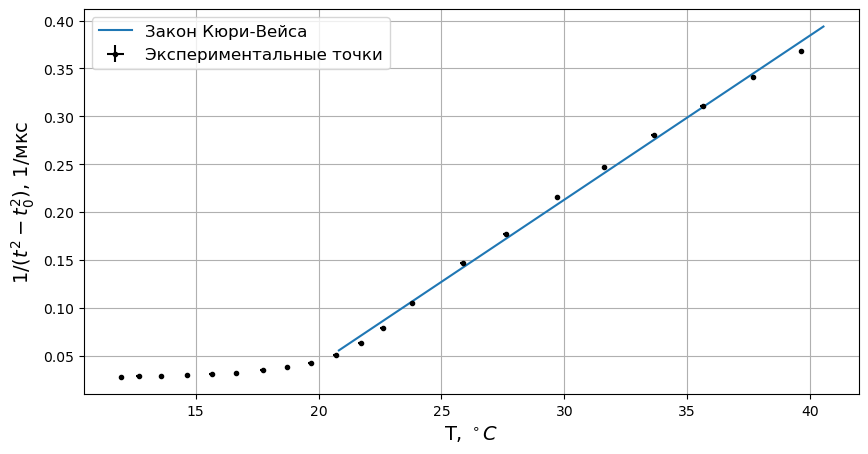

Coefficions calculeted in linear approximation:
k =  0.017160018677994323 +- 0.00034257968983782665
b =  -0.3019612746840021 +- 0.010461933239015448


In [11]:
k_x=np.copy((data[data["t_real"]>=21.5])["t_real"])
k_y=np.copy((data[data["t_real"]>=21.5])["y"])
x_th, y_th = linear_theory((data[data["t_real"]>=21.5])["t_real"], (data[data["t_real"]>=21.5])["y"])
plt.figure(figsize=(10, 5))
plt.plot(x_th, y_th, label="Закон Кюри-Вейса")
plt.errorbar(data["t_real"], data["y"], 0, 0.1, fmt=".k", label="Экспериментальные точки")
plt.xlabel("T, $^\circ C$", fontsize=14)
plt.ylabel("$1/(t^2-t_0^2)$, 1/мкс", fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()
error_of_exp(k_x,k_y)

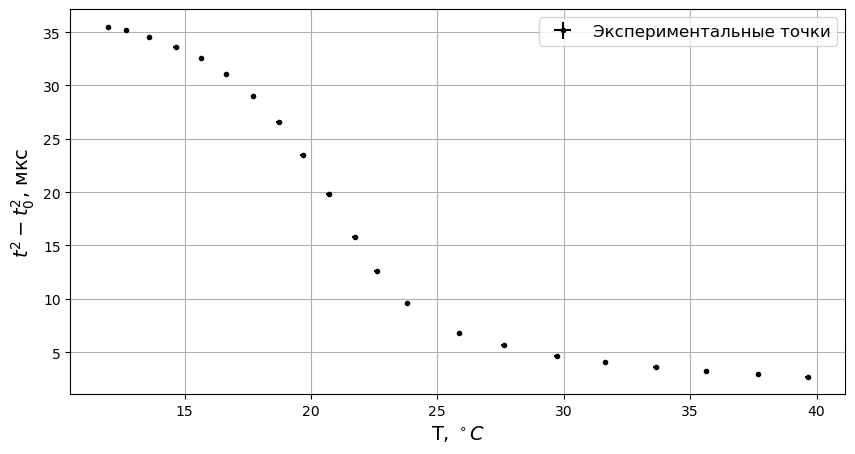

In [ ]:
plt.figure(figsize=(10, 5))
plt.errorbar(data["t_real"], 1/data["y"], 0, 0.1, fmt=".k", label="Экспериментальные точки")
plt.xlabel("T, $^\circ C$", fontsize=14)
plt.ylabel("$t^2-t_0^2$, мкс", fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

$T_k=17.6\pm0.7$